Machine Problem No. 4: K-Means Clustering on a Customer Segmentation Dataset

1. Data Exploration and Preprocessing:

In [1]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('customer_segmentation.csv')

First few rows of the dataset:
   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6

Missing values in each column:
CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

Descriptive statistics:
       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min       1.00000  22.000000   15000.00000       6.000000
25%       5.75000  29.750000   36500.00000      41.500000
50%      10.50000  35.500000   42500.00000      57.500000
75%      15.25000  40.250000   52750.00000      77.000000
max      20.00000  55.000000  100000.00000      92.000000


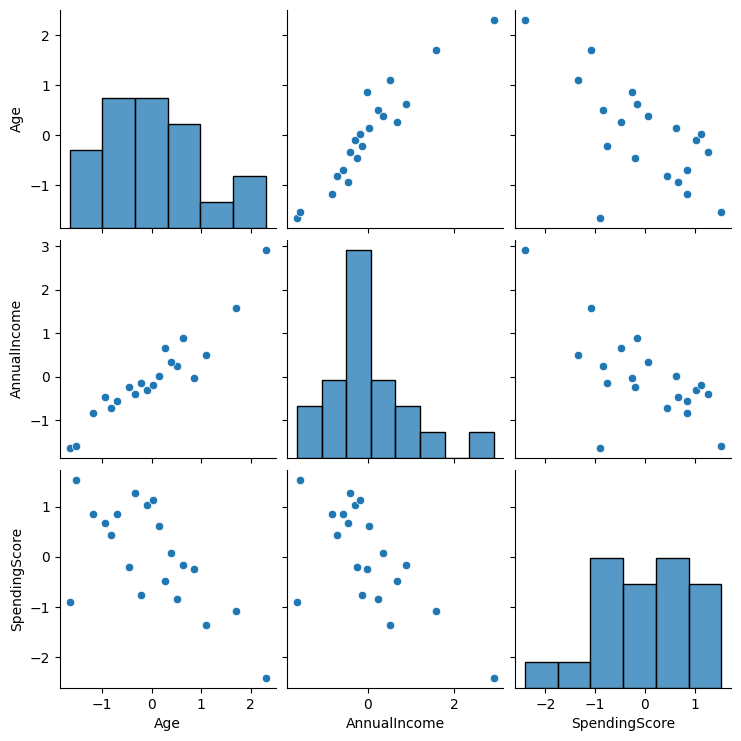

In [4]:
# 1. Perform Exploratory Data Analysis (EDA)
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())

# 2. Handling missing values (if any)
# In this case, we'll drop rows with missing values (or fill them depending on the case)
df = df.dropna()

# 3. Normalize/Scale the Data
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['Age', 'AnnualIncome', 'SpendingScore']] = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])

# 4. Visualize the relationships between features using pair plots
sns.pairplot(df_scaled[['Age', 'AnnualIncome', 'SpendingScore']])
plt.show()


2. Model Development

In [5]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

Cluster labels for k=3:
Cluster
0    11
2     7
1     2
Name: count, dtype: int64


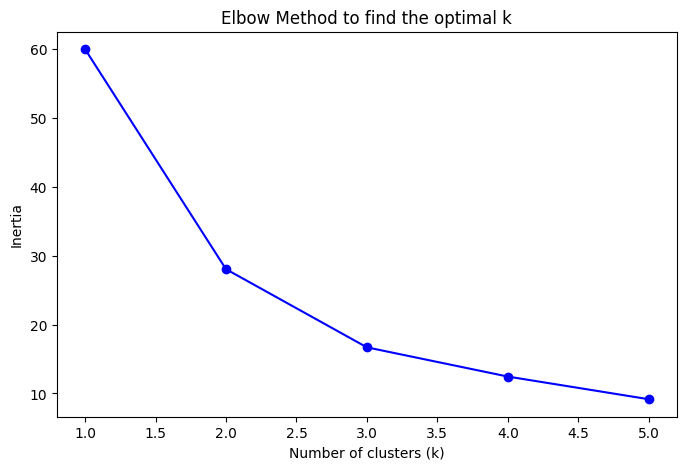

Silhouette Score for k=2: 0.4306792532260083
Silhouette Score for k=3: 0.39635035707595223
Silhouette Score for k=4: 0.318585036594869
Silhouette Score for k=5: 0.3390445303555646


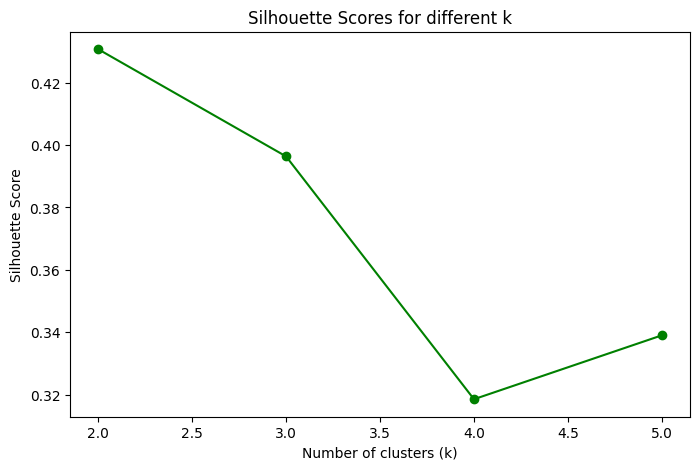

In [6]:
# 1. K-Means Clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[['Age', 'AnnualIncome', 'SpendingScore']])

print("Cluster labels for k=3:")
print(df_scaled['Cluster'].value_counts())

# 2. Experiment with different values of k and use the Elbow Method to determine the optimal number of clusters
inertia = []
K = range(1, 6)  # Trying values from k=1 to k=5
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled[['Age', 'AnnualIncome', 'SpendingScore']])
    inertia.append(kmeans.inertia_)  # Inertia: Sum of squared distances to the nearest cluster center

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to find the optimal k')
plt.show()

# 3. Calculate the silhouette score for each value of k
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled[['Age', 'AnnualIncome', 'SpendingScore']])
    silhouette_avg = silhouette_score(df_scaled[['Age', 'AnnualIncome', 'SpendingScore']], cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for k={k}: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 6), silhouette_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different k')
plt.show()

3. Model Evaluation

In [7]:

# Import libraries for plotting
import seaborn as sns

Inertia for k=3: 16.69901130533106
Silhouette Score for k=3: 0.39635035707595223


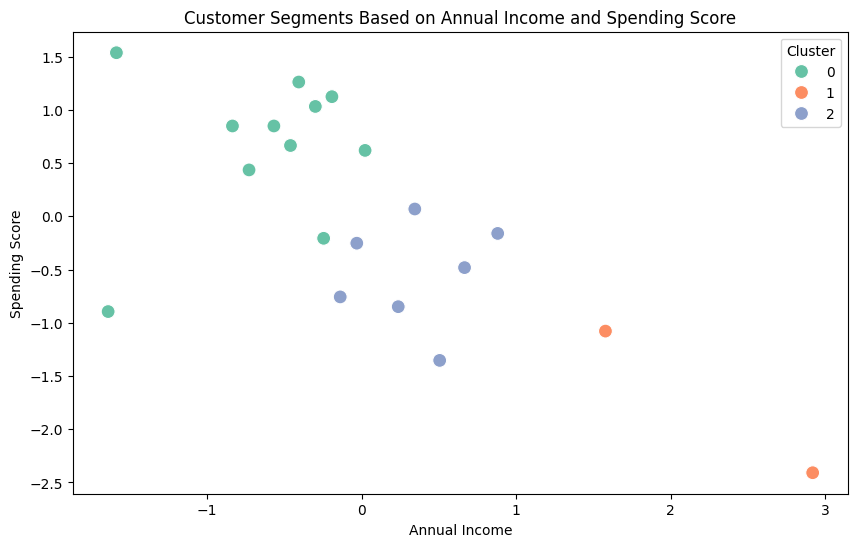

Cluster Characteristics:
          CustomerID       Age  AnnualIncome  SpendingScore
Cluster                                                   
0          9.272727 -0.686003     -0.631899       0.661100
1          6.000000  2.006667      2.247238      -1.743468
2         13.714286  0.504671      0.350916      -0.540737


In [8]:
# 1. Evaluate the model using inertia and silhouette score
# The inertia was already calculated in the previous step (Elbow Method)
# Let's calculate the silhouette score for k=3 (since we already implemented it for different k values)
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[['Age', 'AnnualIncome', 'SpendingScore']])

# Inertia
inertia = kmeans.inertia_
print(f'Inertia for k=3: {inertia}')

# Silhouette score
silhouette_avg = silhouette_score(df_scaled[['Age', 'AnnualIncome', 'SpendingScore']], df_scaled['Cluster'])
print(f'Silhouette Score for k=3: {silhouette_avg}')

# 2. Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scaled, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# 3. Identify the characteristics of each cluster
# We will group the data by 'Cluster' and calculate the mean values for each feature to understand the cluster characteristics
cluster_characteristics = df_scaled.groupby('Cluster').mean()
print("Cluster Characteristics:\n", cluster_characteristics)


4. Report and Visualizations:

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


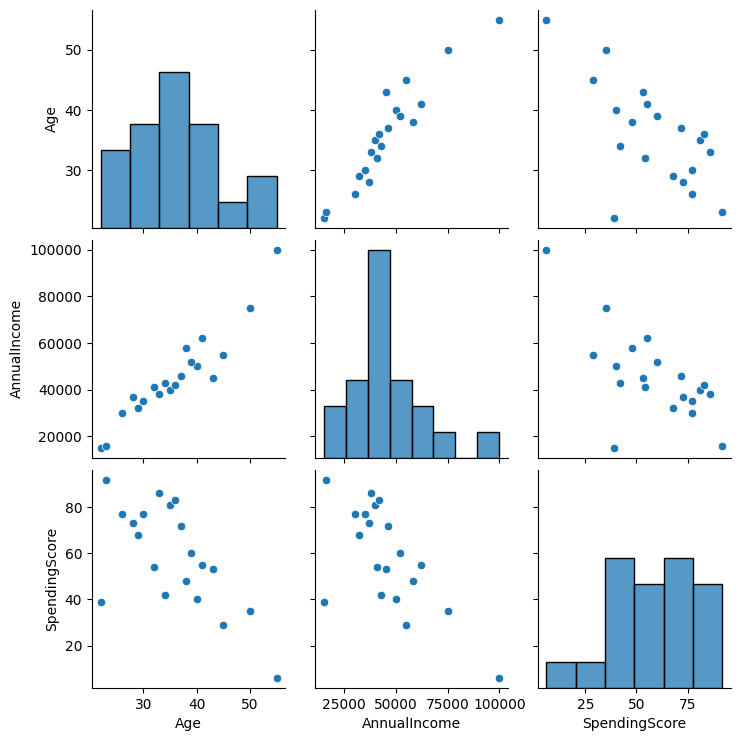

In [11]:

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('customer_segmentation.csv')

# Check for missing values
print(df.isnull().sum())

# Data normalization
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])

# Pairplot for visualization
sns.pairplot(df[['Age', 'AnnualIncome', 'SpendingScore']])
plt.show()

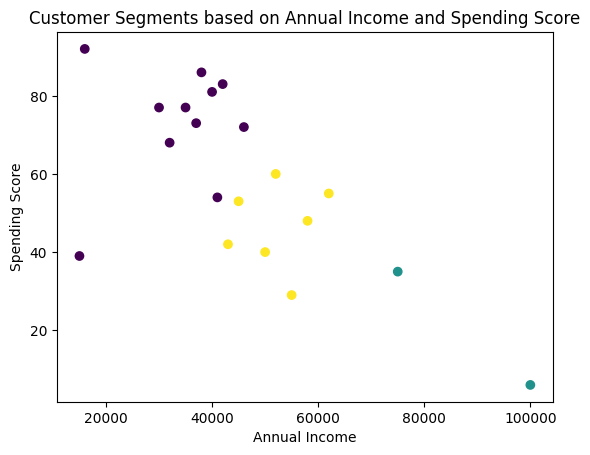

In [12]:
# Implementing K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_normalized)

# Assigning cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Visualize clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


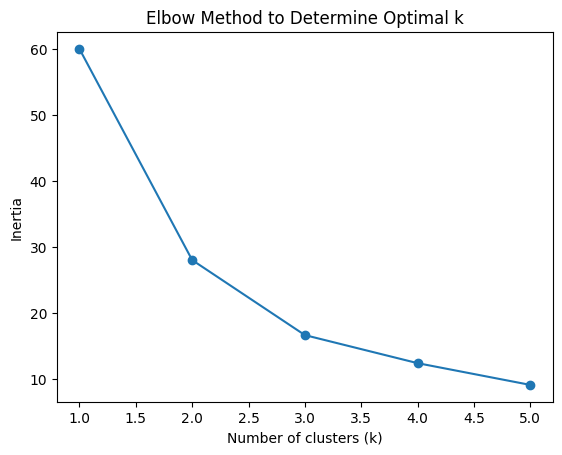

For k=2, the silhouette score is 0.4306792532260083
For k=3, the silhouette score is 0.39635035707595223
For k=4, the silhouette score is 0.318585036594869
For k=5, the silhouette score is 0.3390445303555646


In [13]:
# Finding the optimal number of clusters using the Elbow Method
inertia_values = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 6), inertia_values, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Silhouette Score calculation
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_normalized)
    silhouette_avg = silhouette_score(df_normalized, cluster_labels)
    print(f"For k={k}, the silhouette score is {silhouette_avg}")


In [14]:

# Model Evaluation: inertia and silhouette score for the final model
final_k = 3
kmeans = KMeans(n_clusters=final_k, random_state=42)
cluster_labels = kmeans.fit_predict(df_normalized)
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(df_normalized, cluster_labels)

print(f"Final model with k={final_k}:")
print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette_avg}")

Final model with k=3:
Inertia: 16.69901130533106
Silhouette Score: 0.39635035707595223


In [15]:

# Cluster interpretation by analyzing the means of each cluster
cluster_means = df.groupby('Cluster').mean()

print(cluster_means)

         CustomerID        Age  AnnualIncome  SpendingScore
Cluster                                                    
0          9.272727  30.090909  33818.181818      72.909091
1          6.000000  52.500000  87500.000000      20.500000
2         13.714286  40.000000  52142.857143      46.714286
